In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from PIL import Image
from skimage.filters import threshold_otsu
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb

In [69]:
path = '1carr-96etoh-alexa-sted-decon.tif'
img = Image.open(path).convert('L')
image = np.array(img)

In [70]:
# Thresholding
threshold_value = 130
bw = image > threshold_value

# Thresholding + closure
# threshold_value = threshold_otsu(image)
# bw = closing(image > threshold_value, square(3))

In [71]:
# Labelling
label_image = label(bw)

In [72]:
# Making list of region properties
regions = regionprops(label_image)

# centroids = [x.centroid for x in regions]

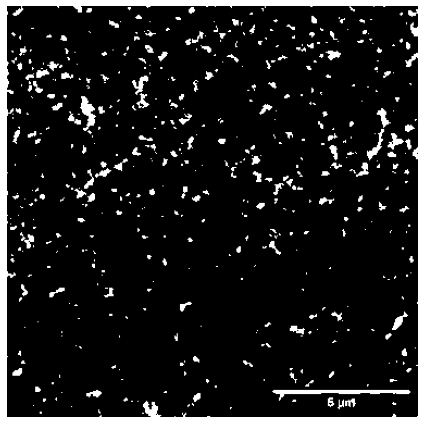

In [73]:
# Visualizing labels as black/white
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(bw, cmap='gray')

ax.set_axis_off()
plt.tight_layout()
plt.show()

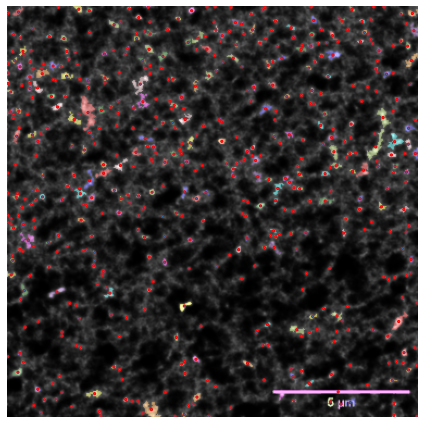

In [75]:
# Visualizing labels with rgb + centroids
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

# if region.area >= 10:

# Coloring centroids
for region in regions:
    y, x = region.centroid
    point = mpatches.Circle((x, y), radius=1, fill=True, edgecolor='red', linewidth=1)
    ax.add_patch(point)

ax.set_axis_off()
plt.tight_layout()
plt.show()